# Credit Card Fraud Detection
## Data Exploration

In this notebook I am reading in the downloaded dataset as well as running some explorational tasks on it.

In [1]:
# import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
path = "C:/Users/ms101/OneDrive/datasets"
credit_data = pd.read_csv(path + "/creditcard.csv")

### General Data Overview

In [3]:
credit_data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
credit_data.shape

(284807, 31)

In [5]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The data has no NAs which is fortunate. It contains 31 columns. 30 can be seen as features. 

### Counting the Instances per Class

Class is the target with 0 meaning no fraud and 1 fraud. As fraud is not very common relative to the massive amounts of non-fraudulent credit card transactions the classes are probably highly skewed. It makes sense to explore how many instances per class there are.

In [7]:
credit_data[["Class"]].value_counts()

Class
0        284315
1           492
dtype: int64

In [8]:
class_ratio = 492/284315
class_ratio

0.0017304750013189597

<AxesSubplot:xlabel='Class'>

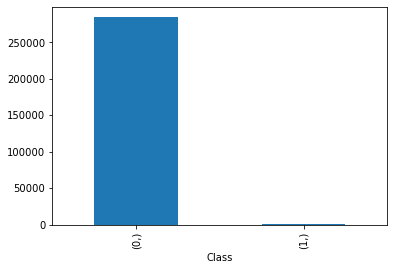

In [9]:
credit_data[["Class"]].value_counts().plot.bar()

As we can see there are only 492 cases of fraud, which make up a tiny proportion of all cases. 

**This leads to some considerations**
- a simple accuracy score will not be a sufficient metric. Even a classifier that always guesses "0" would reach extremely high accuracy.
- as both precision and recall matter the *AUC score for a precision recall curve* could be a good metric.
- *given the damage credit card fraud can cause it might even make sense to be more tolerant of false positives to ensure a very low rate of false negatives.*
- when splitting the data into training, (validation) and test data it is important that enough positive instances are in each test set, in a random split all of the positiv instances could end up in one set only


**Next I will examine the other columns to get an idea about their ranges, mean etc. and to make sure no strong outliers exist.**

### Exploring the features

In [10]:
credit_data.describe().round()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,...,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0
mean,94814.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,88.0,0.0
std,47488.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,250.0,0.0
min,0.0,-56.0,-73.0,-48.0,-6.0,-114.0,-26.0,-44.0,-73.0,-13.0,...,-35.0,-11.0,-45.0,-3.0,-10.0,-3.0,-23.0,-15.0,0.0,0.0
25%,54202.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,...,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.0,0.0
50%,84692.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,22.0,0.0
75%,139320.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0
max,172792.0,2.0,22.0,9.0,17.0,35.0,73.0,121.0,20.0,16.0,...,27.0,11.0,23.0,5.0,8.0,4.0,32.0,34.0,25691.0,1.0


- **Time** describes the seconds elapsed from the first transaction in the data (0) for any given transaction. Its maximum are 172792 seconds which almost equal 48h.
- **Amount** is in € and spans from 0€-25691€ averaging around 88€.
- **All other features** are the result of PCA (which was used to make the data anonymous) thus can't really be described/interpreted

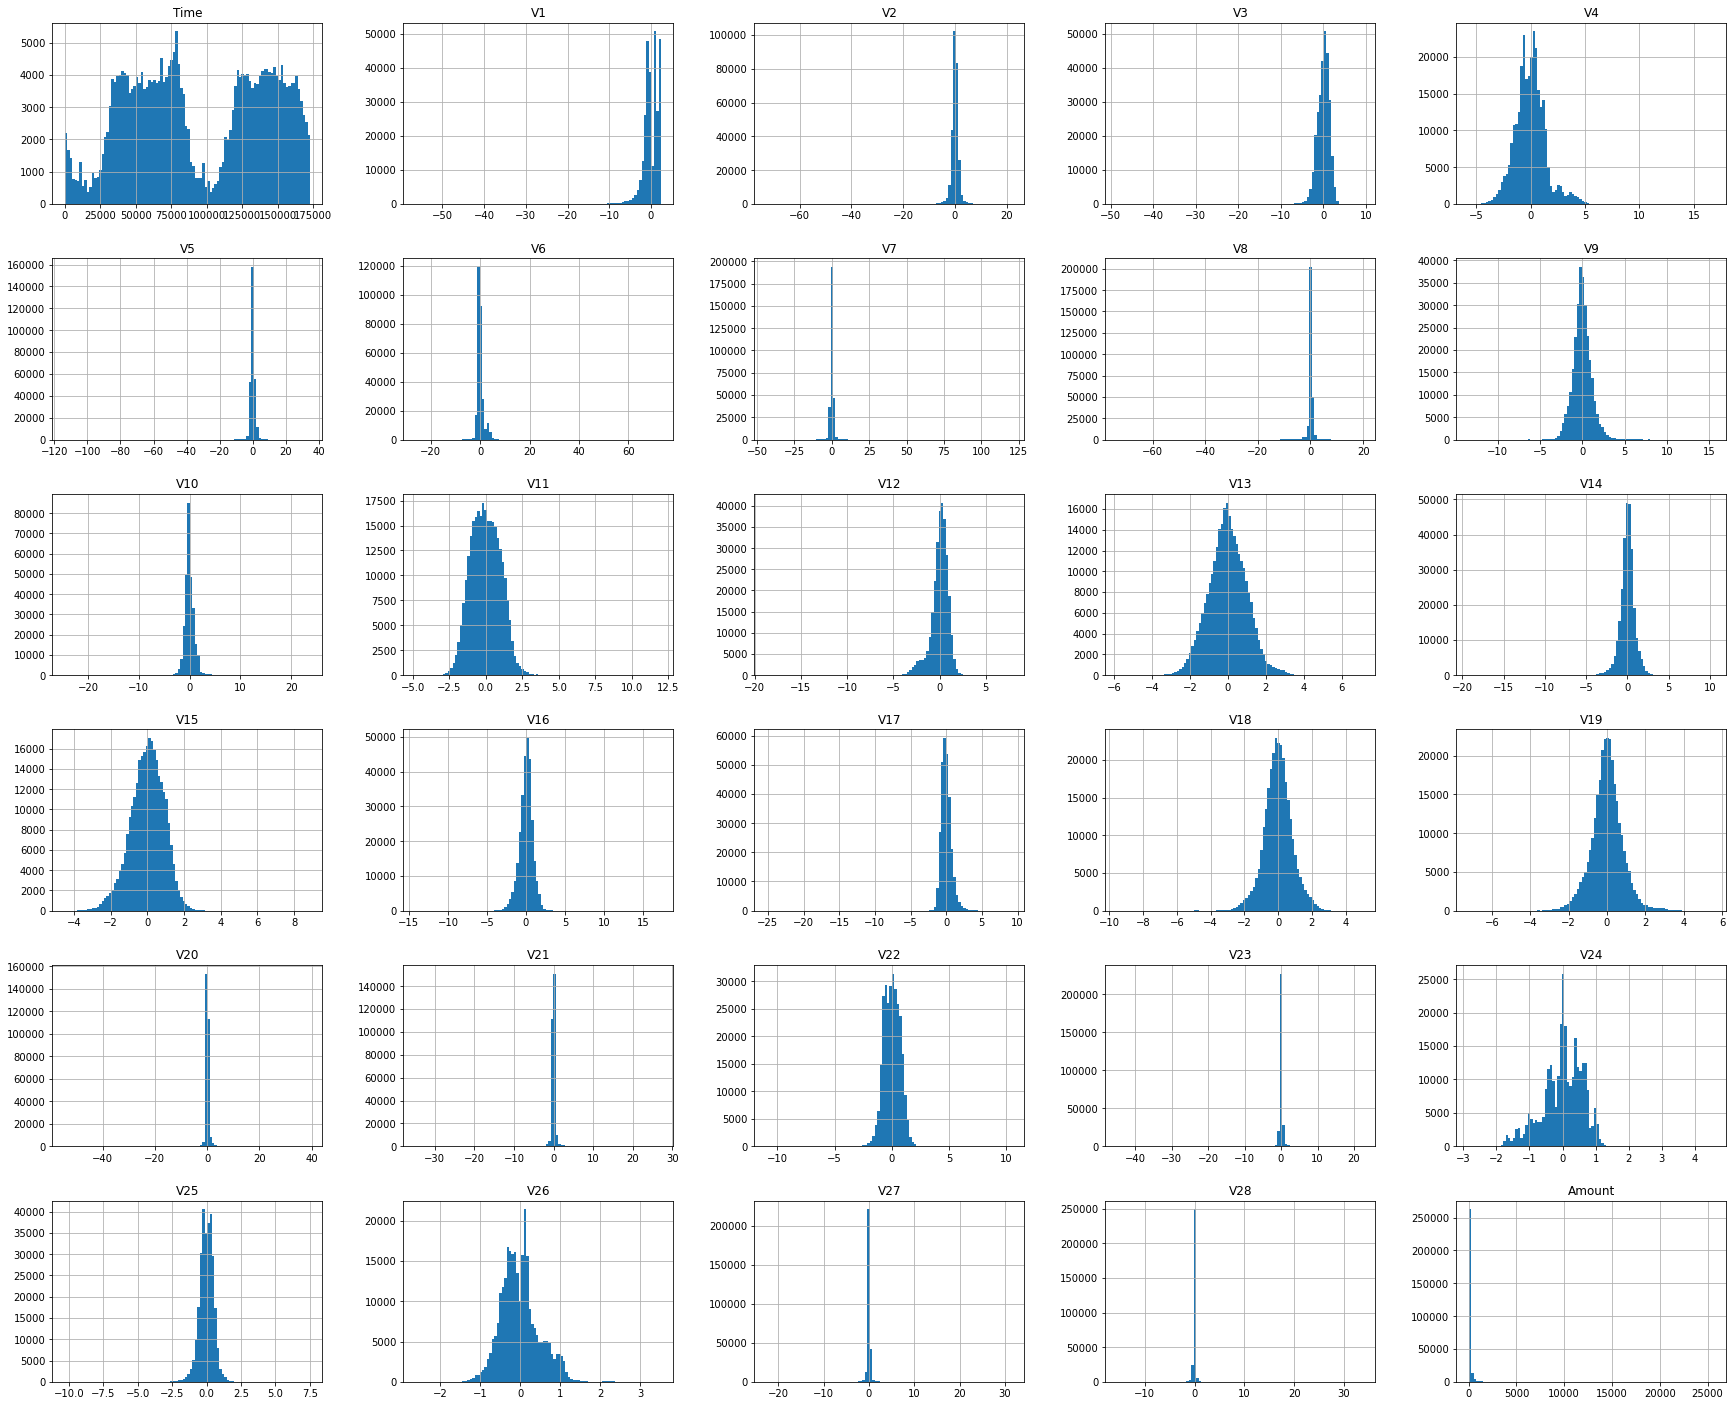

In [11]:
%matplotlib inline
credit_data[credit_data.columns[:-1]].hist(bins = 100, figsize = (30,25))
plt.show()

- **Time** displays the 2 days relatively well. We can see that most of the transactions happened relatively equally spaced throughout the day with far fewer transactions between the two days.
- **Amount** is very skewed. Most transactions are rather small with a few large exeptions. It is worth looking at this feature in depth.
- The PCA-features mostly show distributions that come close to a normal distribution. 

<AxesSubplot:ylabel='Frequency'>

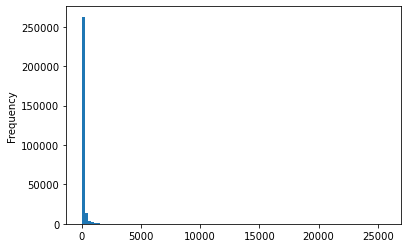

In [12]:
credit_data["Amount"].plot.hist(bins = 100)

In [13]:
for i in range(1,5):
    print("Number of instances that are {} standard deviations from the mean: ".format(i))
    print(credit_data[credit_data["Amount"] > (credit_data["Amount"].mean() + i * credit_data["Amount"].std())].shape[0])

Number of instances that are 1 standard deviations from the mean: 
15710
Number of instances that are 2 standard deviations from the mean: 
7319
Number of instances that are 3 standard deviations from the mean: 
4076
Number of instances that are 4 standard deviations from the mean: 
2555


Most instances have a transaction amount close to the mean as soon as we go further than 1 standard deviation from it, the number of instances gets quite small compared to the number of total instances.

### Exploring the relationships between the Variables

Note: Due to most features being the result of PCA their correlations should not be far from 0.
The most interesting relationships are probably between the target(Class) and feature variables.

In [14]:
credit_data.corr().round(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00000,0.11740,-0.01059,-0.41962,-0.10526,0.17307,-0.06302,0.08471,-0.03695,-0.00866,...,0.04474,0.14406,0.05114,-0.01618,-0.23308,-0.04141,-0.00513,-0.00941,-0.01060,-0.01232
V1,0.11740,1.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,...,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.22771,-0.10135
V2,-0.01059,0.00000,1.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,...,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.53141,0.09129
V3,-0.41962,-0.00000,0.00000,1.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,...,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.21088,-0.19296
V4,-0.10526,0.00000,-0.00000,-0.00000,1.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,...,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.09873,0.13345
V5,0.17307,0.00000,-0.00000,-0.00000,-0.00000,1.00000,0.00000,-0.00000,0.00000,0.00000,...,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.38636,-0.09497
V6,-0.06302,0.00000,0.00000,0.00000,-0.00000,0.00000,1.00000,0.00000,-0.00000,0.00000,...,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.21598,-0.04364
V7,0.08471,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,1.00000,-0.00000,0.00000,...,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.39731,-0.18726
V8,-0.03695,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,1.00000,0.00000,...,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.10308,0.01988
V9,-0.00866,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.04425,-0.09773


As expected, due to the PCA the correlations between V1-V28 are nonexistent. A lot of the PCA features however show small-medium sized correlations with **Class**. 
Neither Amount nor Time are really correlated with Class.


As this is a Pearson or product-moment correlation, I need to check if  `.corr()` switches correlation-methods to appropriate the binary nature of the target.
- is seems as if only the standard pearson correlation is calculated although a point-biserial correlation would be necessary
- to ensure that my conclusion are correct I will calculate the point-biserial correlation for the target and all features.

In [15]:
from scipy import stats

x = credit_data.drop("Class", axis  = 1).copy()
y = credit_data["Class"].copy()



In [16]:
x.shape , y.shape

((284807, 30), (284807,))

In [17]:
x.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [18]:
pointbi_corr = {}
for col in x.columns:
    pointbi_corr[col] =  stats.pointbiserialr(x[col],y)[0]

In [19]:
pd.concat([pd.Series(pointbi_corr),credit_data.corr().round(5)["Class"]],axis = 1)

,0,Class
Time,-0.012323,-0.01232
V1,-0.101347,-0.10135
V2,0.091289,0.09129
V3,-0.192961,-0.19296
V4,0.133447,0.13345
V5,-0.094974,-0.09497
V6,-0.043643,-0.04364
V7,-0.187257,-0.18726
V8,0.019875,0.01988
V9,-0.097733,-0.09773


It seems as if either there is no difference between the standard pearson correlation and the point-biserial cor. Or maybe `.corr()` automatically uses point-biserial when detecting binary/categorical features. This however isn't documented then.